# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Ahmad Zul Zhafran
- **Email:** ahmadzulzhafran@gmail.com
- **ID Dicoding:** amdzz15

## Menentukan Pertanyaan Bisnis

- Bagaimana tingkat PM2.5 dan PM10 bervariasi sepanjang hari?
- Apakah hujan membantu mengurangi tingkat polusi udara?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob

## Data Wrangling

### Gathering Data

In [3]:
#kita satukan menjadi satu dataframe dulu
file_list = glob.glob("/content/PRSA_Data_*.csv")

df_list = []
for file in file_list:
    temp_df = pd.read_csv(file)
    temp_df["station"] = file.split("_")[2]
    df_list.append(temp_df)

df = pd.concat(df_list, ignore_index=True)

df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


**Insight:**
- Dataset ini kaya akan informasi, mencakup polusi udara dan faktor cuaca dari 1 Maret 2013 hingga 28 Februari 2017.
- Banyak faktor yang dapat dianalisis, seperti hubungan antara polusi dan cuaca, tren harian/musiman, serta dampak aktivitas manusia terhadap kualitas udara.
-Data berasal dari berbagai stasiun pemantauan udara di Beijing



### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [5]:
df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [6]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Insight:**
- Banyak ditemukan missing values pada dataset
- Pada dataset tidak ditemukan adanya duplikasi data

### Cleaning Data

In [8]:
colsToFill = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

for col in colsToFill:
    df[col] = df[col].fillna(df[col].mean())

df = df.dropna(subset=['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'])

In [9]:
df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418858 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       418858 non-null  int64  
 1   year     418858 non-null  int64  
 2   month    418858 non-null  int64  
 3   day      418858 non-null  int64  
 4   hour     418858 non-null  int64  
 5   PM2.5    418858 non-null  float64
 6   PM10     418858 non-null  float64
 7   SO2      418858 non-null  float64
 8   NO2      418858 non-null  float64
 9   CO       418858 non-null  float64
 10  O3       418858 non-null  float64
 11  TEMP     418858 non-null  float64
 12  PRES     418858 non-null  float64
 13  DEWP     418858 non-null  float64
 14  RAIN     418858 non-null  float64
 15  wd       418858 non-null  object 
 16  WSPM     418858 non-null  float64
 17  station  418858 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 60.7+ MB


**Insight:**
- Missing values pada kolom PM2.5, PM10, SO2, NO2, CO, dan O3 telah diisi dengan rata-rata nilai masing-masing kolom
- Baris yang memiliki NaN pada TEMP, PRES, DEWP, RAIN, wd, dan WSPM dihapus. Hal ini dikarenakan Missing Values pada kolom tersebut tidak terlalu banyak

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858,418858.000000,418858
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Dongsi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43322,NaN,34980
mean,17485.092955,2014.657039,6.524610,15.722273,11.502722,79.709022,104.541006,15.844216,50.596046,1228.994433,57.502882,13.562796,1010.732098,2.493081,0.064609,NaN,1.734993,NaN
std,10110.297282,1.175590,3.444962,8.801802,6.916863,79.947504,91.052988,21.438231,34.604780,1129.877589,55.804384,11.434838,10.475351,13.800842,0.822399,NaN,1.244678,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,NaN,0.000000,NaN
25%,8730.000000,2014.000000,4.000000,8.000000,6.000000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.200000,1002.200000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17474.000000,2015.000000,7.000000,16.000000,12.000000,57.000000,84.000000,8.000000,45.000000,900.000000,47.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26236.000000,2016.000000,10.000000,23.000000,17.000000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [12]:
df.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM',  'RAIN']].mean()

,PM2.5,PM10,SO2,NO2,CO,O3,WSPM,RAIN
year,,,,,,,,
2013,80.011479,102.824199,19.972976,52.481756,1206.786575,57.342687,1.599644,0.066123
2014,85.422057,115.872229,20.704276,54.578378,1256.102708,58.268956,1.637919,0.049766
2015,79.542262,103.557043,13.068731,48.211952,1256.153882,59.366814,1.779006,0.076155
2016,71.918782,94.606901,9.924675,46.389051,1137.927660,57.692202,1.855936,0.076445
2017,92.154794,110.753323,17.960793,56.939100,1580.208257,40.475411,2.030154,0.002896


In [13]:
df.groupby('month')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM', 'RAIN']].mean()

,PM2.5,PM10,SO2,NO2,CO,O3,WSPM,RAIN
month,,,,,,,,
1,93.441508,113.126530,31.430426,61.481196,1841.871564,28.354754,1.885470,0.000358
2,87.303941,102.548878,27.989886,50.223064,1378.245559,41.371068,2.015666,0.009816
3,94.474357,135.699840,27.846387,59.938538,1307.834841,51.185141,1.977219,0.007590
4,72.891375,116.720624,14.266334,47.396569,851.693170,69.958048,2.176847,0.022918
5,63.586204,107.022544,14.158869,42.852436,819.959657,91.061357,2.068114,0.045905
6,69.348120,86.990241,8.100926,39.603686,1002.290392,93.663755,1.578133,0.133098
7,71.991914,84.988454,5.820775,36.194603,917.625012,93.965133,1.500079,0.268070
8,53.855859,71.835563,4.863730,36.394513,841.049132,87.548339,1.450965,0.096504
9,61.768445,79.975691,6.546813,45.728923,934.004811,55.280278,1.356469,0.125360


In [14]:
df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM', 'RAIN']].corr()

,PM2.5,PM10,SO2,NO2,CO,O3,WSPM,RAIN
PM2.5,1.000000,0.879355,0.478200,0.658219,0.768539,-0.146744,-0.268961,-0.014083
PM10,0.879355,1.000000,0.459085,0.645614,0.686623,-0.109566,-0.181702,-0.026314
SO2,0.478200,0.459085,1.000000,0.491744,0.525584,-0.162880,-0.108678,-0.040062
NO2,0.658219,0.645614,0.491744,1.000000,0.688354,-0.463541,-0.393895,-0.043292
CO,0.768539,0.686623,0.525584,0.688354,1.000000,-0.304970,-0.289727,-0.012923
O3,-0.146744,-0.109566,-0.162880,-0.463541,-0.304970,1.000000,0.289990,0.023068
WSPM,-0.268961,-0.181702,-0.108678,-0.393895,-0.289727,0.289990,1.000000,0.020905
RAIN,-0.014083,-0.026314,-0.040062,-0.043292,-0.012923,0.023068,0.020905,1.000000


In [15]:
df.groupby('day')[['PM2.5', 'PM10']].mean()

,PM2.5,PM10
day,,
1,88.878370,110.614816
2,74.016703,92.729267
3,82.900526,109.549413
4,88.286505,111.688989
5,76.383169,100.895462
6,85.664086,106.048390
7,84.665356,104.050293
8,81.335799,101.945135
9,71.000868,96.088680


**Insight:**
- PM2.5 dan PM10 mengalami peningkatan dari 2013 ke 2017, menunjukkan tren kualitas udara yang memburuk.
- NO2 dan CO mengalami kenaikan, yang dapat mengindikasikan peningkatan polusi akibat aktivitas industri atau transportasi.
- PM2.5 dan PM10 tertinggi pada bulan Desember dan Januari, menunjukkan bahwa musim dingin memiliki tingkat polusi udara yang lebih tinggi. Hal ini dapat disebabkan oleh peningkatan penggunaan bahan bakar untuk pemanas serta kondisi atmosfer yang menahan polutan di permukaan.
- Musim dingin memiliki tingkat polusi lebih tinggi, kemungkinan karena faktor pemanasan rumah tangga dan kondisi atmosfer.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<Figure size 1000x500 with 0 Axes>

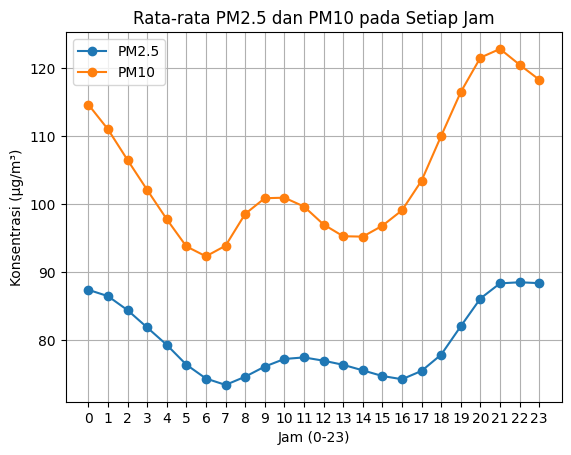

In [17]:
df_hourly = df.groupby("hour")[['PM2.5', 'PM10']].mean()

plt.figure(figsize=(10, 5))
df_hourly.plot(marker="o")
plt.title("Rata-rata PM2.5 dan PM10 pada Setiap Jam")
plt.xlabel("Jam (0-23)")
plt.ylabel("Konsentrasi (µg/m³)")
plt.xticks(range(0, 24))
plt.legend(["PM2.5", "PM10"])
plt.grid()
plt.show()

### Pertanyaan 2:

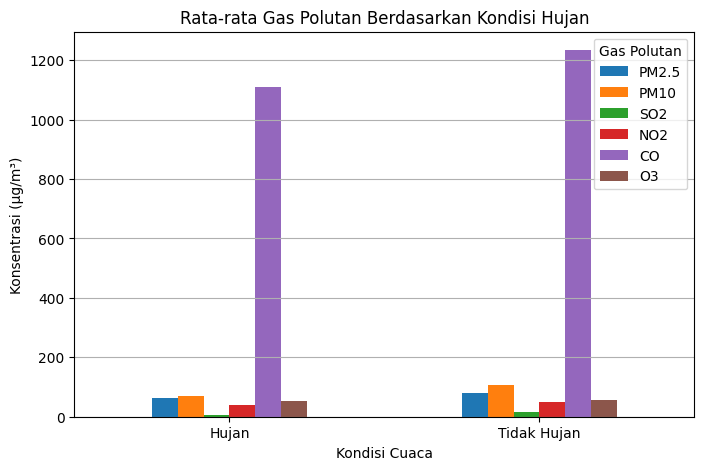

In [28]:
df["Rain Category"] = df["RAIN"].apply(lambda x: "Hujan" if x > 0 else "Tidak Hujan")

df_rain = df.groupby("Rain Category")[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

ax = df_rain.plot(kind="bar", rot=0, figsize=(8, 5))
ax.set_title("Rata-rata Gas Polutan Berdasarkan Kondisi Hujan")
ax.set_xlabel("Kondisi Cuaca")
ax.set_ylabel("Konsentrasi (µg/m³)")
ax.legend(title="Gas Polutan")
ax.grid(axis="y")

plt.show()


**Insight:**
- Konsentrasi PM2.5 dan PM10 terlihat meningkat setelah pukul 18:00 dan mencapai puncak sekitar 20:00 - 22:00. Hal ini dapat disebabkan oleh aktivitas manusia seperti lalu lintas kendaraan, pembakaran bahan bakar, atau kondisi atmosfer yang menyebabkan polutan terjebak di udara saat suhu lebih rendah.
- PM10 memiliki pola yang mirip dengan PM2.5 tetapi dengan konsentrasi yang lebih tinggi.
- Terdapat sedikit penurunan PM2.5 dan PM10 saat hujan, yang bisa disebabkan oleh efek pengendapan polutan oleh hujan.
- CO tetap tinggi dalam kondisi hujan dan tidak hujan, yang menunjukkan bahwa sumber emisinya dominan dan tidak terpengaruh oleh curah hujan.

## Conclusion

### Pertanyaan 1

- Konsentrasi PM2.5 dan PM10 meningkat mulai sore hingga malam hari, dengan puncaknya terjadi sekitar pukul 21:00 - 23:00. Hal ini dapat disebabkan oleh penurunan kecepatan angin dan suhu udara di malam hari, yang membuat polutan lebih sulit tersebar dan tetap berada di permukaan.
- Tingkat PM2.5 dan PM10 cenderung menurun setelah tengah malam dan mencapai titik terendah pada pagi hari (sekitar pukul 04:00 - 07:00).Hal ini dapat disebabkan oleh peningkatan aktivitas atmosfer dan kecepatan angin di pagi hari yang membantu menyebarkan polutan.
- Polusi udara memiliki pola siklik harian yang dipengaruhi oleh faktor atmosfer dan aktivitas manusia. Konsentrasi PM2.5 dan PM10 cenderung lebih tinggi pada malam hari dan lebih rendah pada pagi hari. Oleh karena itu, masyarakat yang sensitif terhadap polusi udara (seperti penderita asma atau penyakit pernapasan lainnya) sebaiknya menghindari aktivitas luar ruangan di malam hari, terutama di area dengan tingkat polusi tinggi.

### Pertanyaan 2

- Konsentrasi PM2.5, PM10, SO2, NO2, dan CO tidak mengalami penurunan yang signifikan saat hujan dibandingkan dengan saat tidak hujan. Ini menunjukkan bahwa hujan tidak secara drastis menghilangkan polutan dari udara dalam jangka pendek.
- Hujan memang dapat membantu mengurangi polutan di udara, tetapi efeknya tidak selalu signifikan dan bergantung pada intensitas serta durasi hujan. Hujan deras cenderung lebih efektif dalam membersihkan udara dibandingkan hujan ringan. Namun, beberapa gas polutan tetap ada dan bahkan bisa menimbulkan dampak lingkungan lain, seperti hujan asam.